# Darstellung von Funktionen mit mehreren Variablen

## Notizen zur Vertiefung

In [53]:
import numpy as np
import matplotlib.pyplot as plt


### Beispiel 1: Test-Funktionen für Optimierung

Auf der Wikipedia-Seite ["Test-Functions for Optimization"](https://en.wikipedia.org/wiki/Test_functions_for_optimization) befinden sich viele spannende Funktionen von meist zwei Variablen $x$ und $y$. Wir betrachten mal die [Ackley-Function](https://en.wikipedia.org/wiki/Ackley_function):

$$ a(x,y) = -20\exp\Big[-0.2\sqrt{0.5\left(x^2 + y^2\right)}\Big] - \exp\Big[0.5\left(\cos(2\pi x) + \cos(2\pi y)\right)\Big] + e + 20 $$

und die Himmelblau-Funktion:

$$ h(x,y) = \left(x^2 + y - 11\right)^2 + \left(x + y^2 - 7\right)^2 $$


In [54]:
def ackley(x, y):
    return (
        -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2)))
        - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y)))
        + np.exp(1)
        + 20
    )


def himmelblau(x, y):
    return (x**2 + y - 11) ** 2 + (x + y**2 - 7) ** 2


Um ein Gitternetz von über die $x$-$y$-Ebene aufzuspannen und an allen Punkten die Funktionswerte zu berechnen, verwenden wir die Funktion [`np.meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html).

1. Hat man eine Funktion geschrieben die die Berechnung beinhaltet **Ackley/Himmelblau(name der Funktion)**
2. x, y definiert in welche Zahlen, dass man nehmen will (-5,5)
3. meshgrid erstellt 
4. Variable definiert für Ackley und Himmelblau *normalerweise wäre dies dann unsere Variable Z*
5. Mit contour begonnen die Funktion zu plotten. 

**Bei subplots entscheidet die erste zahl immer die anzahl Zeilen und die zweite Zahl die Anzahl Spalten Beispiel: fig, axs = plt.subplots(2, 4,)**

**Der Rest kann je nach Aufgabe Variieren jedoch sind die ersten 4 Schritte immer gleich!!**

In [55]:
x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
X,Y = np.meshgrid(x,y)
Z = ackley(X, Y)
H = himmelblau(X,Y)


Höhenlinien mit [`plt.contour`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html). Ausprobieren:

- Parameter `levels=25` und höher
- [`plt.contour`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) verwenden

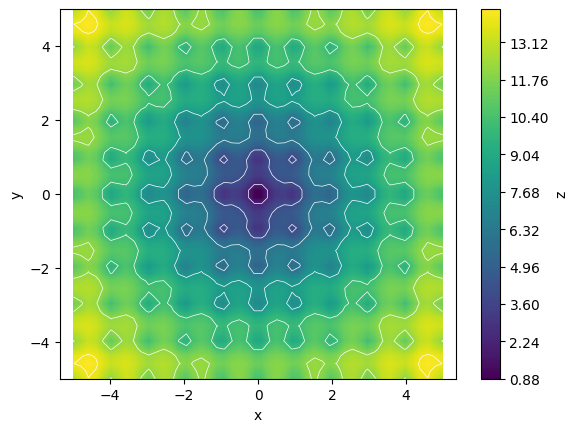

In [56]:
plt.contourf(X, Y, Z, levels=200)
plt.colorbar(label="z")
plt.contour(X, Y, Z, colors="w", linewidths=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()

Mit [`plt.contour`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) kann man auch mal konstante $x$ und konstante $y$ Werte anschauen. Nutze [`plt.subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html), um zwei Achsenpaare nebeneinander zu machen:

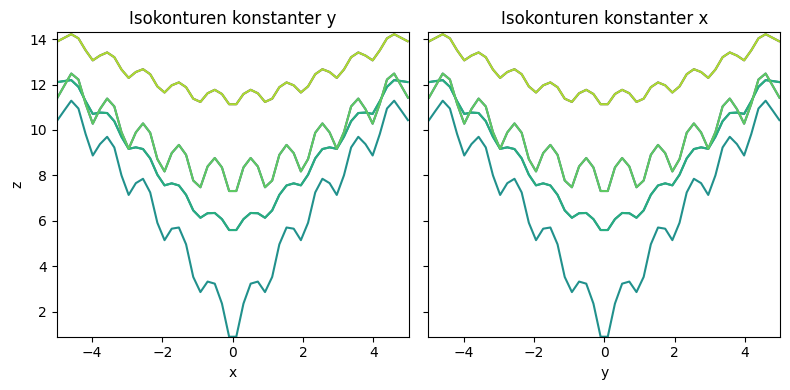

In [57]:
fig, (ax1, ax2) = plt.subplots(1,2 , sharey=True, figsize=(8, 4))
ax1.contour(X, Z, Y)
ax1.set_xlabel("x")
ax1.set_ylabel("z")
ax1.set_title("Isokonturen konstanter y")
ax2.contour(Y, Z, X)
ax2.set_xlabel("y")
ax2.set_title("Isokonturen konstanter x")
plt.tight_layout()
plt.show()

Auch Flächen im Raum sind eine Möglichkeit der Darstellung.

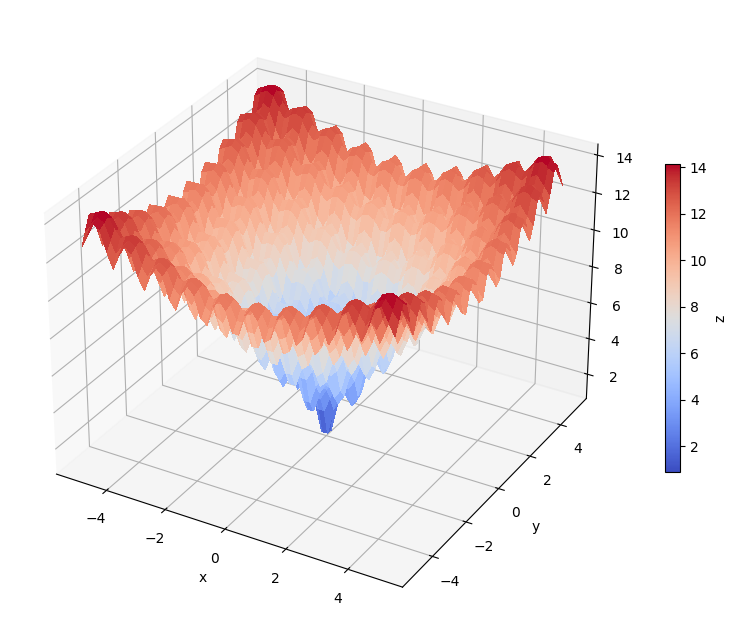

In [58]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 8))
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, antialiased=False)
plt.colorbar(surf, shrink=0.5, label="z")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()


### Beispiel 2: Zeitverlauf einer Diffusion in 2D

Ein Öltropfen verteilt sich auf der Wasseroberfläche. Die Konzentration des Öls modellieren wir mal mit einer Gaussfunktion

$$ f(x,y) = \frac{1}{\sqrt{2\sigma^2}} \exp\left[ -\frac{x^2 + y^2}{2\sigma^2} \right] $$

bei der die Varianz mit der Zeit zunimmt

$$ \sigma^2 \propto t $$

In [59]:
def gauss(x, y, sigma2):
    return np.exp(-(x**2 + y**2) / (2 * sigma2)) / np.sqrt(sigma2)


In [60]:
n = 200
x = np.linspace(-3, 3, n)
y = x
X, Y = np.meshgrid(x, y)
t = np.arange(8)

Zt = []
for ti in t:
    sigma2 = ti + 0.1
    Zt.append(gauss(X, Y, sigma2))


Darstellen mit mehreren Koordinatenachsen in einem Diagramm.

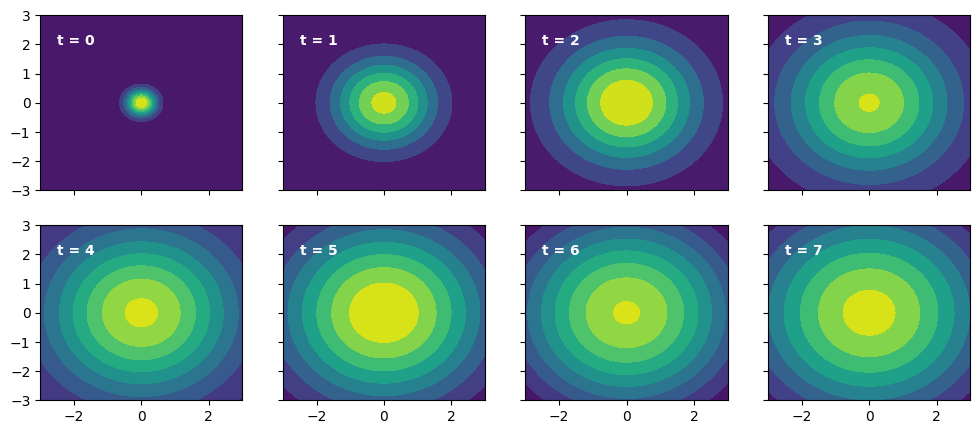

In [63]:
fig, axs = plt.subplots(2, 4, figsize=(12, 5), sharex=True, sharey=True)
for ax, Z, ti in zip(axs.flat, Zt, t):
    ax.contourf(X, Y, Z)
    # ax.set_title(f"t={ti}")
    ax.text(-2.5, 2, f"t = {ti}", color="white", fontweight="bold")
plt.show()



### Beispiel 3: Methode der kleinsten Quadrate

Bei der Regression (Modellfunktion an Daten anpassen) verwendet man häufig die [Methode der kleinsten Quadrate](https://en.wikipedia.org/wiki/Least_squares) (engl. [Least quares](https://en.wikipedia.org/wiki/Least_squares)). Bei der linearen Regression wird eine lineare Funktion

$$ f(x) = mx + b $$

an eine Messwerte $(x_i,y_i)$ angepasst. Dabei sollen $m$ und $b$ so bestimmt werden, dass die Summe der quadratischen Fehler ([Residuenquadratsumme](https://de.wikipedia.org/wiki/Residuenquadratsumme)) minimiert wird.

$$ SQR(m,b) = \sum_{i}^n \left(y_i - mx_i - b \right)^2 $$

$SQR$ ist also eine Funktion von zwei Variablen.

#### Schritt 1: Daten simulieren

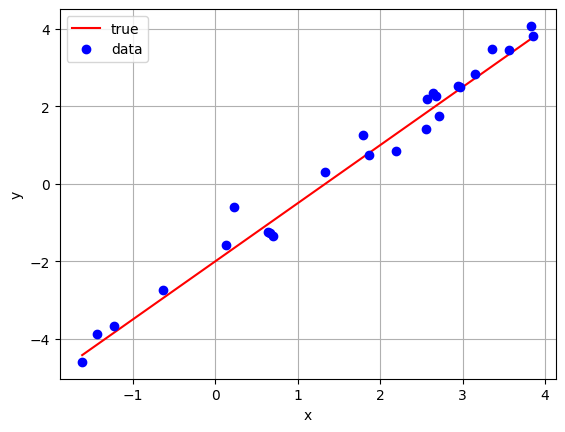

In [61]:
m_true = 1.5
b_true = -2
sigma = 0.5

rng = np.random.default_rng(42)
n = 25
x = np.sort(rng.uniform(-2, 4, size=n))
y_true = m_true * x + b_true
y = y_true + rng.normal(scale=sigma, size=n)

plt.plot(x, y_true, "r", label="true")
plt.plot(x, y, "bo", label="data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()


#### Schritt 2: Residuenquadratsumme berechnen und darstellen

In [62]:
def SQR(m, b):
    return np.sum((y - (m * x + b)) ** 2)


Weil `x` und `y` bereits Matrizen sind, können wir nicht ohne Weiteres einfach noch mit weiteren Matrizen `M` und `B` multiplizieren oder addieren. Eine einfache Lösung ist, über alle Werte-Paare in `(m,b)` zu iterieren - mithilfe von [`itertools.product`](https://docs.python.org/3/library/itertools.html#itertools.product).

Eine Alternative ist, zufällig Punkte im "Suchraum" zu generieren.